# Fit line profiles to 1D Gaussian functions with offset for background

A table will be output with one row per analysed profile, with these columns:
Background, Peak height above background, Peak centre position, Gaussian fitted sigma, Gaussian fitted FWHM

## Imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from tkinter.filedialog import askdirectory
from tkinter import Tk

## Run this and choose the data input folder

In [6]:
Tk().withdraw()
loadfolder = askdirectory(title='Please select input folder')
print('You chose ' + loadfolder)

You chose C:/Temp/PlotActininTestInput


## Run this and choose the data output folder

In [3]:
Tk().withdraw()
outputfolder = askdirectory(title='Please select output folder', initialdir=loadfolder)
print('You chose ' + outputfolder)

You chose C:/Temp/PlotActininTestOutput


## Define Gaussian function with offset

In [4]:
def gauss_1d_offset(x_values, bg, y_max, x_centre, sigma):
    """1D Gaussian function including offset.
    Args:
        x_values (numpy array) : Position coordinates
        bg (float) : Offset for background
        y_max (float) : Extremum of Gaussian peak
            (as in ImageJ, instead of amplitude above bg, because max/bg might be useful)
        x_centre (float) : Position of centre of Gaussian peak
        sigma (float) : SD for Gaussian peak above background
    
    Returns:
        y_values (numpy array) : Gaussian distribution plus offset
    """
    y_values = bg + (y_max - bg) * np.exp(-(x_values - x_centre) ** 2 / (2 * sigma ** 2))
    return y_values

## For each csv file, do Gaussian fit

And these must be **comma**-separated, not tab...

In [23]:
csv_counter = 0
analysed_files = 0
parameters = []
for file in os.listdir(loadfolder):
    # print(file[-3:])
    extension = ('.csv')
    if file.endswith(extension): # Check every file for csv format
        csv_counter = csv_counter + 1
        filepath = os.path.join(loadfolder, file)
        with open(filepath) as input_file:
            input_data = [line.replace('\t', ',') for line in input_file]
        print(file)
        input_xy = np.loadtxt(input_data, delimiter=',', skiprows=1) # Load in data (ImageJ saves a header row)
        if input_xy.shape[1] == 2:
            analysed_files = analysed_files + 1
            x = input_xy[:, 0]
            y = input_xy[:, 1]
            params_opt, params_cov = curve_fit(gauss_1d_offset, x, y,
                                               p0=(np.min(y), np.max(y), np.mean(x),
                                               (np.max(x) - np.min(x)) / 10
                                               ) # p0 is initial guesses for fit
                                              ) # Fit to Gaussian with offset
            # print(params_opt)
            parameters.append(params_opt) # Append results to parameters table

print('There were ' + repr(csv_counter) + ' .csv files.')
print(repr(analysed_files) + ' had the right number of columns and were analysed.')

3.005a.csv
3.005b.csv
3.005c.csv
3.005d.csv
3.005e.csv
3.005f.csv
4.100b.csv
4.100c.csv
4.100d.csv
4.100e.csv
4.100f.csv
4.10_01.csv
4.124c.csv
4.125a.csv
4.125b.csv
4.125d.csv
4.125e.csv
5.045a.csv
5.045c.csv
5.045d.csv
5.045e.csv
5.045f.csv
5.066a.csv
5.066b.csv
5.066c.csv
5.066d.csv
5.066e.csv
6.056a.csv
6.056b.csv
6.056c.csv
6.056d.csv
6.056e.csv
6.056f.csv
7.054a.csv
7.054b.csv
7.054c.csv
7.054d.csv
7.054e.csv
7.054f.csv
There were 39 .csv files.
39 had the right number of columns and were analysed.


## Output as table

In [24]:
parameters = np.asarray(parameters)

# Calculate FWHM from sigma and include
FWHM = parameters[:, 3] * 2.355
parameters = np.column_stack((parameters, FWHM))
# print(parameters)

header = 'BG, Peak height above BG, peak centre position, Gaussian sigma, Gaussian FWHM'
np.savetxt(os.path.join(outputfolder, 'GaussianFitParams.csv'),
           parameters, delimiter=',', header=header)

print('Parameters saved in ' + os.path.join(outputfolder, 'GaussianFitParams.csv'))

Parameters saved in C:/Temp/PlotActininTestOutput\GaussianFitParams.csv


## Check a few plots and fits

On the same axes, at the moment

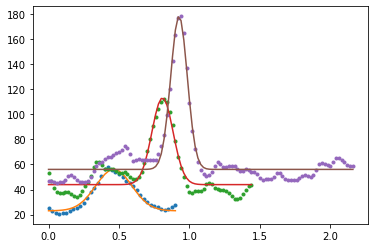

In [42]:
csv_counter = 0
analysed_files = 0
quartile = 1 # Show fits 1/4, 1/2 and 3/4 way through analysed files
for file in os.listdir(loadfolder):
    extension = ('.csv')
    if file.endswith(extension): # Check every file for csv format
        csv_counter = csv_counter + 1
        filepath = os.path.join(loadfolder, file)
        with open(filepath) as input_file:
            input_data = [line.replace('\t', ',') for line in input_file]
        input_xy = np.loadtxt(input_data, delimiter=',', skiprows=1) # Load in data (ImageJ saves a header row)
        if input_xy.shape[1] == 2:
            if analysed_files == int(parameters.shape[0] / 4 * quartile):
                x = input_xy[:, 0]
                y = input_xy[:, 1]
                y_gaussfit = gauss_1d_offset(x, *parameters[analysed_files, 0:-1]) # Don't include FWHM
                plt.plot(x, y, '.', x, y_gaussfit, '-')
                quartile = quartile + 1
            analysed_files = analysed_files + 1